In [3]:
import cartopy
import matplotlib.pyplot as plt
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
import cartopy.crs as ccrs
import numpy as np
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
plt.rcParams.update({'font.size': 12})

In [4]:
coordinates = (-19.001, -11.49, 26.99, 30.001)
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)
data_crs = ccrs.PlateCarree()

In [16]:
textprops = dict(facecolor='white', alpha=0.05, edgecolor='white')

In [11]:
def add_release_position(ax):
    textkwargs = dict(fontsize=18, transform=data_crs, ha="center", va="bottom", zorder=8)
    ax.plot(-12.8442, 29.0813, "ko", ms=8, zorder=8, transform=data_crs)
    ax.text(-12.8442, 29.0813, "A", **textkwargs)
    ax.plot(-13.0722, 29.2632, "ko", ms=8, zorder=8, transform=data_crs)
    ax.text(-13.0722, 29.2632, "B", **textkwargs)
    ax.plot(-13.8402, 28.8031, "ko", ms=8, zorder=8, transform=data_crs)
    ax.text(-13.8402, 28.8031, "C", **textkwargs)
    ax.plot(-13.7202, 28.6398, "ko", ms=8, zorder=8, transform=data_crs)
    ax.text(-13.7202, 28.6398, "D", **textkwargs)

In [12]:
def add_island_names(ax):
    plotkwargs = dict(transform=data_crs, ha="center", fontsize=14, bbox=textprops, zorder=7)
    ax.text(-15.5917, 27.975, "Gran Canaria", **plotkwargs)
    ax.text(-16.573, 28.222, "Tenerife", **plotkwargs)
    ax.text(-17.8391, 28.6906, "La Palma", **plotkwargs)
    ax.text(-18.0093, 27.7364, "El Hierro", **plotkwargs)
    ax.text(-17.2252, 28.1168, "La Gomera", **plotkwargs)
    ax.text(-14.013, 28.411, "Fuerteventura", **plotkwargs)
    ax.text(-13.672, 29.027, "Lanzarote", **plotkwargs)

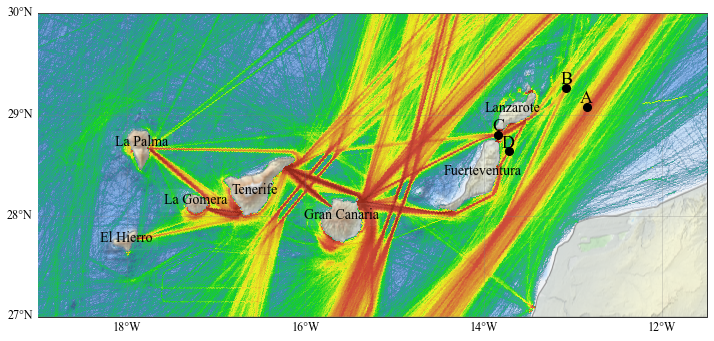

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj)

# Release positions
add_release_position(ax)

# Island names
add_island_names(ax)

# Traffic density map (2020)
ax.add_wms(wms='https://ows.emodnet-humanactivities.eu/wms',
           layers=['2020_yearly_rd_All'], alpha=.85, zorder=4)
           

# EMODnet bathymetry
ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['emodnet:mean_atlas_land', 'coastlines'],
               transform=myproj, zorder=3)

# Grid lines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-20., -10., 2.))
gl.ylocator = mticker.FixedLocator(np.arange(26., 31., 1.))

# Domain extension
ax.set_extent(coordinates)

plt.savefig("../figures/canary_map01.png", dpi=300, bbox_inches="tight")
plt.show()

## Archipielago Chinijo

In [17]:
coordinates_zoom = (-14.65, -12.49, 27.99, 29.501)
myproj2 = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)

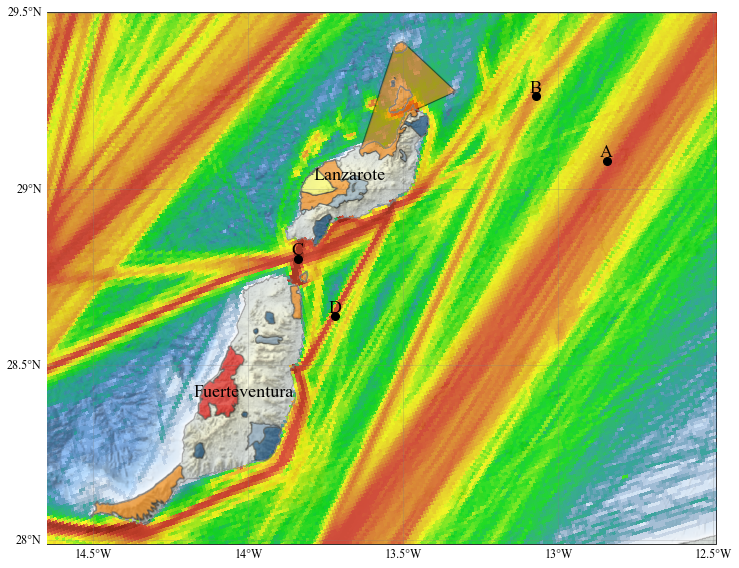

In [18]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj2)

plotkwargs = dict(transform=data_crs, ha="center", fontsize=18, bbox=textprops, zorder=7)

ax.text(-14.013, 28.411, "Fuerteventura", **plotkwargs)
ax.text(-13.672, 29.027, "Lanzarote", **plotkwargs)

# Release positions
add_release_position(ax)

ax.add_wms(wms='https://ows.emodnet-humanactivities.eu/wms',
           layers=['2020_yearly_rd_All'], alpha=.85, zorder=4)
           

ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['emodnet:mean_atlas_land'],
               transform=myproj, zorder=3)

ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['coastlines'],
               transform=myproj, zorder=9)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

ax.add_wms(wms='https://idecan2.grafcan.es/ServicioWMS/EspNat?',
               layers=['EENN'],
               transform=myproj, zorder=5, alpha=.6)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-20., -12., 0.5))
gl.ylocator = mticker.FixedLocator(np.arange(26., 31., 0.5))

ax.set_extent(coordinates_zoom)
plt.savefig("../figures/canary_map02.png", dpi=300, bbox_inches="tight")

plt.show()